#Gradient Descent

##Gradient Vector

Consider the funtion $f({\bf x})$ where ${\bf x} \in R^d$. The gradient is the derivative of $f$ w.r.t $\bf x$:

$$\nabla f({\bf x}) = \frac{\partial f}{\partial {\bf x}} = \left[ \frac{\partial f}{\partial x_1} ~~~ \frac{\partial f}{\partial x_2} ~~~ \cdots ~~~ \frac{\partial f}{\partial x_d} \right]^T$$


If $f$ is differentiable and has an extremum at a point ${\bf x}$ in a region $S$, then the partial derivatives $\partial f/\partial x_j$ must be zero at $\bf x$. These are the components of the gradient of $f$. Thus

$$\nabla f({\bf x}) = {\bf 0}$$

The point at which the gradient is zero, is called a stationary point of $f$.

##Linear Regression Revisited

Suppose that at discrete points ${\bf x}_i$, observations $y_i$ of some phenomenon are made, and the results are recorded as a set of ordered pairs:

$$\{({\bf x}_1, y_1), ({\bf x}_2, y_2), \cdots, ({\bf x}_n, y_n)\}$$

On the basis of these points, the problem is to make estimations or predictions at points $\hat{{\bf x}}$ that are between or beyond the observation points ${\bf x}_i$. We can try to find the equation of a curve $y=f({\bf x})$ that closeley fits the data points.

The simplest curve to fit the data is a hyperplane:

$$f({\bf x}) = \beta_0 + \beta_1 x_1 + \cdots + \beta_d x_d = {\bf \beta}^T {\bf x}$$

Here ${\bf \beta} = [\beta_0 ~~ \beta_1 ~~ \cdots ~~ \beta_d]^T$, and we've used $x_0 = 1$.

<img src="imgs/least_squares_plane.png" width=300>

###Cost Function

We want to determine the coefficients $\beta$ that best fit the data in the sense that the sum of the squares of the errors $e_1, e_2, \cdots, e_n$ is minimal. The distance from the point $({\bf x}_i, y_i)$ to the plane $f({\bf x})$ is

$$e_i = \left |f({\bf x}_i) - y_i \right| = \left |\beta^T {\bf x}_i - y_i \right|$$

If we define a vector ${\bf e} = [e_1 ~~ e_2 ~~ \cdots ~~ e_d]^T$, we can write the __cost function__ as

$$J({\bf \beta}) = {\bf e}^T {\bf e} = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (\beta^T {\bf x}_i - y_i)^2$$

We wish to find the the coefficients $\bf \beta$ that minimize the above const function. The condition for minima is

$$\nabla J({\bf \beta}) = \frac{\partial J}{\partial {\bf \beta}} = {\bf 0}$$

###Gradient Descent

We can use gradient descent method to find $\bf \beta$ that minimizes the cost function. This is an uncontrained optimization of $J({\bf \beta})$.

Suppose that $J$ has a minimum at ${\hat{\bf \beta}}$. We start at some $\bf \beta$ (close to $\hat{\bf \beta}$) and we look for the minimum of $J$ close to $\bf \beta$ along the straight line in the direction of $-{\bf \nabla} J({\bf \beta})$, which is the direction of steepest descent (= direction of maximum decrease) of $J$ at $\bf \beta$:

$${\bf \beta}'(\alpha) = {\bf \beta} - \alpha {\bf \nabla} J({\bf \beta})$$

We take ${\bf \beta}'$ as our next approximation to ${\bf \beta}$. $\alpha$ is called the _learning rate_.

In order for gradient descent to work we must set the learning rate to an appropriate value. This parameter determines how fast or slow we will move towards the optimal value. If the $\alpha$ is very large we will skip the optimal solution. If it is too small we will need too many iterations to converge to the best values.

<img src="imgs/learning_rate.png"/>

To implement the gradient descent method, we first need to compute the partial derivatives fo $J$ w.r.t to components of $\bf \beta$. The derivative with respect to the $j$th component of $\bf \beta$ can be evaluated as

$$\frac{\partial J}{\partial \beta_j} = \frac{\partial}{\partial \beta_j}\left( \sum_{i=1}^{n} (\beta^T {\bf x}_i - y_i)^2 \right)$$

Since the derivative is a linear operation, we can write

$$\frac{\partial J}{\partial \beta_j} = \sum_{i=1}^{n} \frac{\partial}{\partial \beta_j}(\beta^T {\bf x}_i - y_i)^2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

$$~~~~~~~~~~~~~~~~~~~~~~ = \sum_{i=1}^{n} 2 (\beta^T {\bf x}_i - y_i) \frac{\partial}{\partial \beta_j}(\beta_0 x_{i0} + \beta_1 x_{i1} +\cdots +\beta_d x_{id} - y_i)$$

$$ = \sum_{i=1}^{n} 2 (\beta^T {\bf x}_i - y_i) x_{ij}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

We can express the above derivative in matrix form by represent the data in terms of the following matrix

$${\bf X} = \begin{bmatrix} {\bf x}_1^T \\ {\bf x}_2^T \\ \vdots \\ {\bf x}_n^T \end{bmatrix} = \begin{bmatrix} {\bf X}_0 & {\bf X}_1 & \cdots & {\bf X}_d \end{bmatrix}$$

Here ${\bf X}_j$ denote _feature vectors_. Thus

$${\bf X \beta} - {\bf y} = \begin{bmatrix} {\bf x}_1^T {\bf \beta} - y_1 \\ {\bf x}_2^T {\bf \beta} - y_2 \\ \vdots \\ {\bf x}_n^T {\bf \beta} - y_n\end{bmatrix} $$

Note that ${\bf \beta}^T {\bf x}_i = {\bf x}_i^T {\bf \beta}$. This allows us to express the derivatives of $J$ in more compact form

$$\frac{\partial J}{\partial \beta_j} = 2 {\bf X}_j^T ({\bf X \beta} - {\bf y})$$

And, finally

$$\nabla J({\bf \beta}) = \left[ \frac{\partial J}{\partial \beta_0} ~~ \frac{\partial J}{\partial \beta_1} ~~ \cdots ~~ \frac{\partial J}{\partial \beta_d} \right]^T$$

And, the cost function becomes

$$J({\bf \beta}) = ({\bf X \beta} - {\bf y})^T ({\bf X \beta} - {\bf y})$$

###Exercise

We'll consider the data collected in an observational study in a semiconductor manufacturing plant. The file `pull_strength.csv` contains three variables, pull strength (a measure of the amount of force required to break the bond), the wire length, and the height of the die. Find a model relating pull strength to wire length and die height. Plot the data and the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

data = np.genfromtxt('pull_strength.csv', delimiter=',', skip_header=1)

y = data[:,0:1]
X = data[:,1:3]

A = np.hstack((np.ones([y.shape[0],1]), X))

print A

b = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))
print 'beta:\n', b

e = A.dot(b) - y #error vector
print "\nRSS: ", e.T.dot(e)[0][0]

[[   1.    2.   50.]
 [   1.    8.  110.]
 [   1.   11.  120.]
 [   1.   10.  550.]
 [   1.    8.  295.]
 [   1.    4.  200.]
 [   1.    2.  375.]
 [   1.    2.   52.]
 [   1.    9.  100.]
 [   1.    8.  300.]
 [   1.    4.  412.]
 [   1.   11.  400.]
 [   1.   12.  500.]
 [   1.    2.  360.]
 [   1.    4.  205.]
 [   1.    4.  400.]
 [   1.   20.  600.]
 [   1.    1.  585.]
 [   1.   10.  540.]
 [   1.   15.  250.]
 [   1.   15.  290.]
 [   1.   16.  510.]
 [   1.   17.  590.]
 [   1.    6.  100.]
 [   1.    5.  400.]]
beta:
[[ 2.26379143]
 [ 2.74426964]
 [ 0.01252781]]

RSS:  115.17348278


Now we can solve the same problem using gradient descent!

beta:
[[ 2.02227938]
 [ 2.57081564]
 [ 0.01688604]]

RSS:  138.917910182


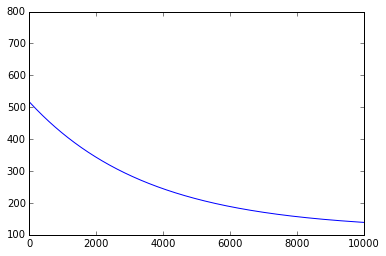

In [17]:
b0 = np.array([[2],[2],[0]])
a = 0.0000001

def cost_func(b):
    e = A.dot(b) - y
    return e.T.dot(e)[0][0]

def derivative_J(b, j):
    Aj = A[:,j].reshape((len(A),1))
    return 2*Aj.T.dot(A.dot(b) - y)[0]

def gradient_J(b):
    grad = [derivative_J(b, j) for j in range(len(b))]
    return np.array(grad)


N_itr = 10000
J = []
for i in range(N_itr):
    b0 = b0 - a*gradient_J(b0)
    J.append(cost_func(b0))

print 'beta:\n', b0

e = A.dot(b0) - y #error vector
print "\nRSS: ", e.T.dot(e)[0][0]

plt.plot(range(N_itr), J)

Also, plot the cost function vs number of iterations.

###Stochastic Gradient Descent

The gradient descent method discussed above is called _batch gradient descent_ because it iterates through all the data before calculating $\bf \beta$:

$${\bf \beta}_j' = {\bf \beta}_j - \alpha \sum_{i=1}^{n} (\beta^T {\bf x}_i - y_i) x_{ij}$$

For larger data sets, this can take very long to converge.

Alternatively, we can compute the gradient for each iteration on the basis of single randomly picked examle ${\bf x}_i$:

$${\bf \beta}_j' = {\bf \beta}_j - \alpha (\beta^T {\bf x}_i - y_i) x_{ij}$$

In general stochastic gradient descent converges to minimum much faster than the batch gradient method.

###Exercise

Implement stochastic gradient method for the previous example. Since, we have very few points, we'll note pick example randomly. But still update $\beta$ for each data point ${\bf x}_i$.

beta:
[ 2.01508468  2.41143777  0.02156052]

RSS:  203.098303633


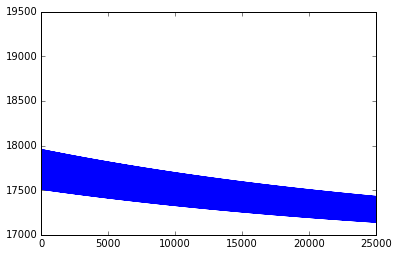

In [14]:
#implement SGD
b0 = np.array([2.,2.,0.])
a = 0.000001

def cost_func(b):
    e = A.dot(b) - y
    return e.T.dot(e)[0][0]

J = []
N_itr = 1000
for n in range(N_itr):
    for i in range(len(y)):
        for j in range(len(b0)):
            b0[j] = b0[j] - a * (b0.dot(A[i]) - y[i][0])*A[i][j]
        J.append(cost_func(b0))
        
        
print 'beta:\n', b0

e = A.dot(b0.reshape(len(b0),1)) - y #error vector
print "\nRSS: ", e.T.dot(e)[0][0]


plt.plot(J)

##General Case

In several machine learning algrithms, we wish to learn a hypothesis function, $h({\bf x})$ given the data set $\{ {\bf x}_i\}$. For linear regression, the hypothesis function is $h = {\bf \beta}^T {\bf x}$. The parameters $\bf \beta$ are _learned_ by optimizing the cost function:

$$J({\bf \beta}) = \sum_{i=1}^{n} (h({\bf x}_i) - y_i)^2$$

We can find $\beta$ by optimizing the cost function, using batch gradient descent method:

$${\bf \beta}_j' = {\bf \beta}_j - \alpha \sum_{i=1}^{n} \nabla_j \left( h ({\bf x}_i) - y_i \right)^2$$

Here $\nabla_j$ represents the derivative w.r.t to $\beta_j$.

For larger data sets we can use stochastic gradient method instead:

$${\bf \beta}_j' = {\bf \beta}_j - \alpha  \nabla_j \left( h ({\bf x}_i) - y_i \right)^2$$